# Customer Satisfaction Prediction

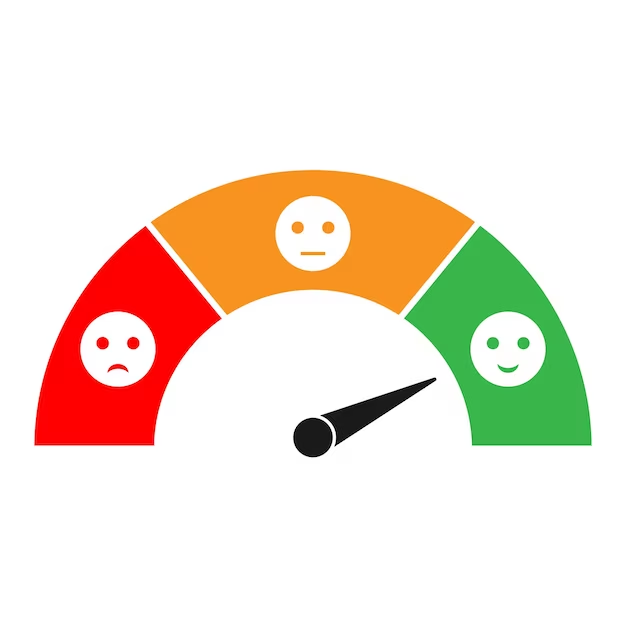
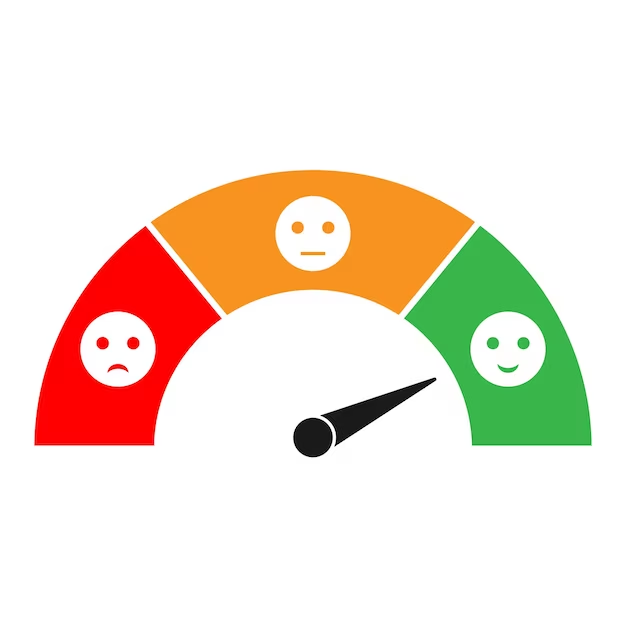

## Introduction
The goal of this project is to predict the probability that a customer is unsatisfied based on various customer-related features. The target variable, `TARGET`, is a binary indicator where `1` represents an unsatisfied customer and `0` represents a satisfied customer. The dataset consists of multiple numeric variables that capture various aspects of customer behavior, transactions, and interactions with the company. This project aims to build a model that can accurately predict customer satisfaction levels.

## Aim
The aim of this analysis is to:
- Predict the probability that each customer is unsatisfied (i.e., predict the `TARGET` value).
- Use machine learning classification algorithms, such as Logistic Regression, Random Forest, Gradient Boosting, and others, to model the data.
- Evaluate model performance using accuracy, precision, recall, and other classification metrics.
- Handle imbalanced classes using techniques like SMOTE to improve prediction performance.

## Requirements

In [44]:
import pandas as pd
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize, scale
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

## Import Data

In [11]:
df=pd.read_csv('/kaggle/input/santander-customer-satisfaction/train.csv')

## EDA (Exploratory Data Analysis)

In [12]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,...,num_trasp_var33_out_ult1,num_venta_var44_hace3,num_venta_var44_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_var2_ult1,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.00,88.89,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.00,0.18,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,27,3,18,48,0,186.09,0.00,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,3.00,0.30,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [6]:
df.shape

(76020, 371)

In [7]:
df.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,76020.0,75964.050723,43781.947379,1.00,38104.7500,76043.00,113748.7500,151838.00
var3,76020.0,-1523.199277,39033.462364,-999999.00,2.0000,2.00,2.0000,238.00
var15,76020.0,33.212865,12.956486,5.00,23.0000,28.00,40.0000,105.00
imp_ent_var16_ult1,76020.0,86.208265,1614.757313,0.00,0.0000,0.00,0.0000,210000.00
imp_op_var39_comer_ult1,76020.0,72.363067,339.315831,0.00,0.0000,0.00,0.0000,12888.03
...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,76020.0,1.858575,147.786584,0.00,0.0000,0.00,0.0000,24650.01
saldo_medio_var44_ult1,76020.0,76.026165,4040.337842,0.00,0.0000,0.00,0.0000,681462.90
saldo_medio_var44_ult3,76020.0,56.614351,2852.579397,0.00,0.0000,0.00,0.0000,397884.30
var38,76020.0,117235.809430,182664.598503,5163.75,67870.6125,106409.16,118756.2525,22034738.76


In [9]:
df['TARGET'].unique()

array([0, 1])

In [48]:
df['TARGET'].value_counts()

TARGET
0    73012
1     3008
Name: count, dtype: int64

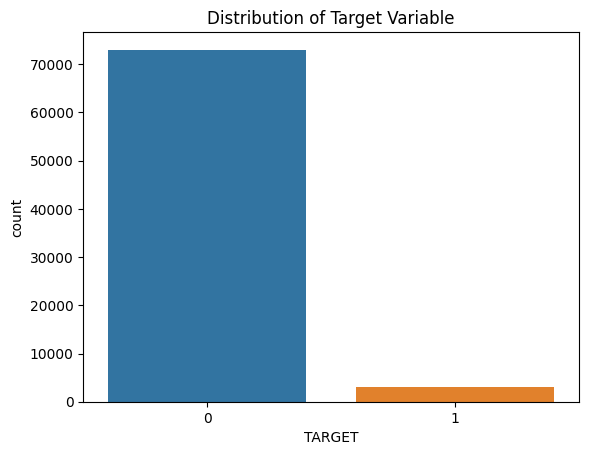

In [38]:
sns.countplot(x='TARGET', data=df)
plt.title('Distribution of Target Variable')
plt.show()

## Modelling with Conversational Models

In [42]:
x=df.drop(['TARGET'],axis=1)
y=df[['TARGET']]

### Data Augmentation

In [45]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [47]:
y_resampled.value_counts()

TARGET
0         73012
1         73012
Name: count, dtype: int64

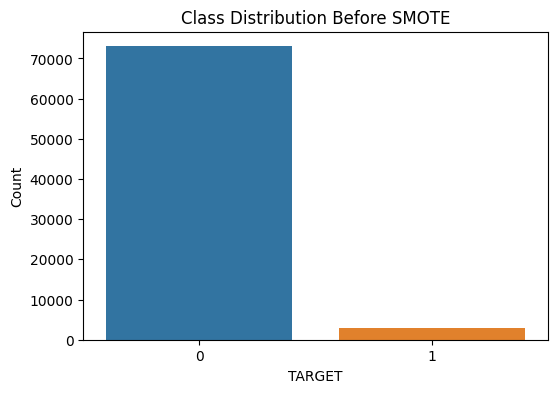

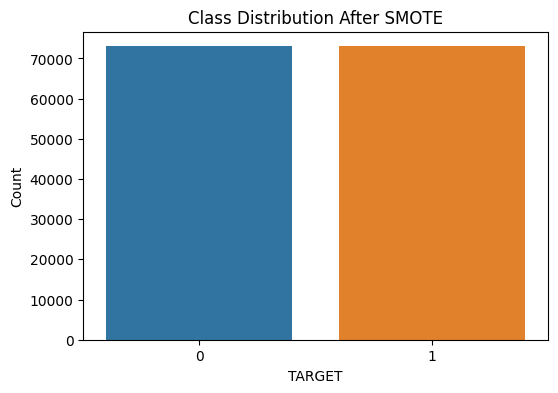

In [57]:
plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=df)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled['TARGET'])
plt.title('Class Distribution After SMOTE')
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.show()

In [20]:
def classification_algo(x, y, confusion_mtr=False, classification_rpt=False):
    g = GaussianNB()
    b = BernoulliNB()
    l = LogisticRegression()
    d = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    h = GradientBoostingClassifier()
    k = KNeighborsClassifier()
    lgbm = LGBMClassifier(verbose=-1) 

    algos = [g, b, l, d, rf, h, k, lgbm]  
    algo_names = ['Gaussian NB', 'Bernoulli NB', 'Logistic Regression', 
                  'Decision Tree Classifier', 'Random Forest Classifier', 
                  'Gradient Boosting Classifier', 'KNeighbors Classifier', 
                  'LightGBM Classifier']  

    accuracy = []
    confusion = []
    classification = []
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    result = pd.DataFrame(columns=['Accuracy Score', 'Confusion Matrix', 'Classification Report'], 
                          index=algo_names)

    labels = sorted(y["TARGET"].unique())

    for algo in algos:
        p = algo.fit(x_train, y_train).predict(x_test)
        accuracy.append(accuracy_score(y_test, p))
        confusion.append(confusion_matrix(y_test, p, labels=labels))
        classification.append(classification_report(y_test, p))

    # Store results
    result['Accuracy Score'] = accuracy
    result['Confusion Matrix'] = confusion
    result['Classification Report'] = classification

    r_table = result.sort_values('Accuracy Score', ascending=False)
    
    if confusion_mtr:
        for index, row in r_table.iterrows():
            confusion_mat = np.array(row['Confusion Matrix'])
            print(f"Confusion Matrix of {index}")
            plt.figure(figsize=(5, 4))
            sns.heatmap(confusion_mat, annot=True, fmt="d", 
                        xticklabels=labels, yticklabels=labels, cmap="Blues")
            plt.xlabel("Predicted Labels")
            plt.ylabel("True Labels")
            plt.show()
    
    if classification_rpt:
        for index, row in r_table.iterrows():
            print(f"Classification Report of {index}:")
            print(row['Classification Report'])

    return r_table[['Accuracy Score']]

Confusion Matrix of Random Forest Classifier


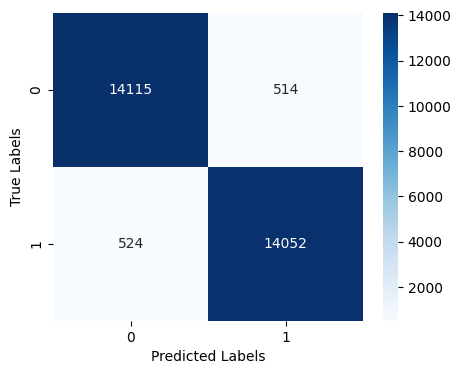

Confusion Matrix of Decision Tree Classifier


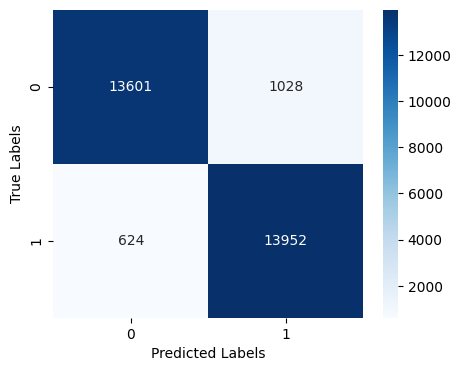

Confusion Matrix of LightGBM Classifier


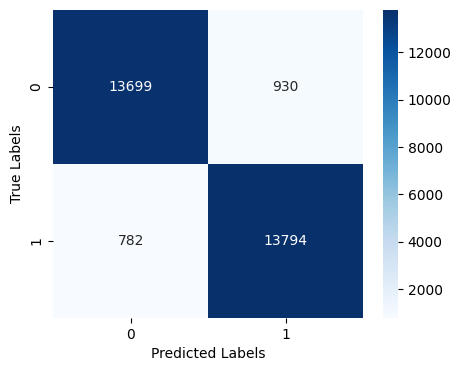

Confusion Matrix of Gradient Boosting Classifier


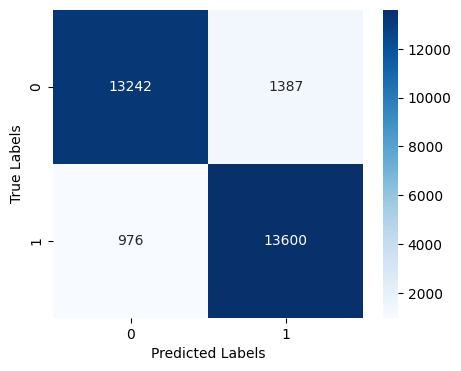

Confusion Matrix of KNeighbors Classifier


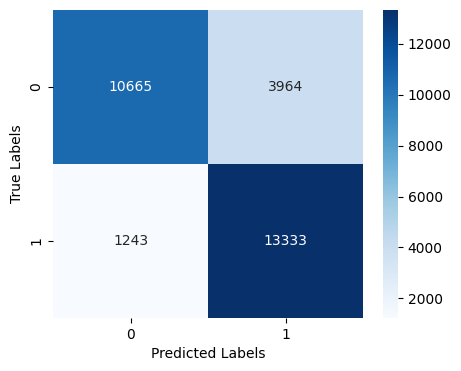

Confusion Matrix of Bernoulli NB


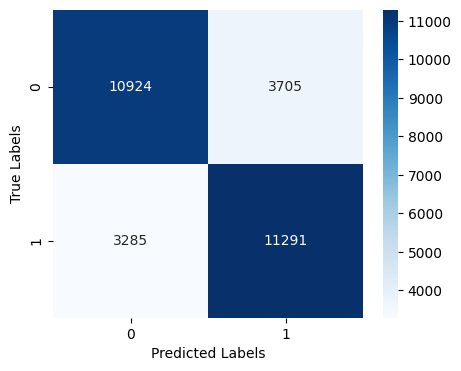

Confusion Matrix of Logistic Regression


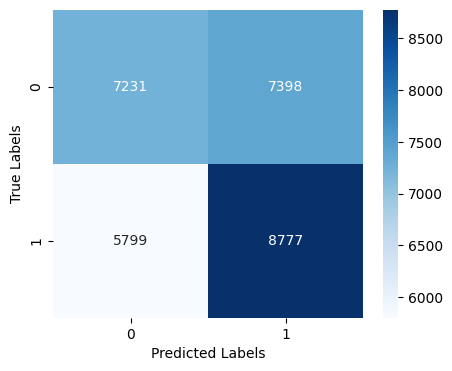

Confusion Matrix of Gaussian NB


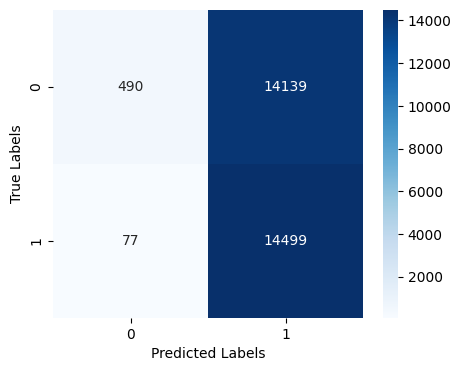

Classification Report of Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     14629
           1       0.96      0.96      0.96     14576

    accuracy                           0.96     29205
   macro avg       0.96      0.96      0.96     29205
weighted avg       0.96      0.96      0.96     29205

Classification Report of Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     14629
           1       0.93      0.96      0.94     14576

    accuracy                           0.94     29205
   macro avg       0.94      0.94      0.94     29205
weighted avg       0.94      0.94      0.94     29205

Classification Report of LightGBM Classifier:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     14629
           1       0.94      0.95      0.94     14576

    accuracy                      

,Accuracy Score
Random Forest Classifier,0.964458
Decision Tree Classifier,0.943434
LightGBM Classifier,0.941380
Gradient Boosting Classifier,0.919089
KNeighbors Classifier,0.821709
Bernoulli NB,0.760657
Logistic Regression,0.548125
Gaussian NB,0.513234


In [46]:
classification_algo(x_resampled, y_resampled,confusion_mtr=True,classification_rpt=True)

## Testing the Best Conversational Model 

In [49]:
rf = RandomForestClassifier()
model1=rf.fit(x, y)

In [50]:
df_test=pd.read_csv('/kaggle/input/santander-customer-satisfaction/test.csv')

In [51]:
submission=pd.DataFrame({
    'ID':df_test['ID']}
)

In [52]:
predictions=model1.predict(df_test)

In [53]:
submission['TARGET']=predictions

In [54]:
submission.to_csv("submission.csv", index=False)

## Modelling with Deep Learning

In [30]:
x_train , x_test, y_train, y_test =train_test_split(x_resampled, y_resampled,test_size=.2,random_state=42)

In [31]:
model2=Sequential()
model2.add(Dense(8, activation='relu'))
model2.add(Dense(32,activation='relu')) 
model2.add(Dense(64,activation='relu')) 
model2.add(Dense(128,activation='relu'))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(2,activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
history=model2.fit(x_train,y_train,epochs=50,validation_split=.20,verbose=1)

Epoch 1/50
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9225 - loss: 12765.7539 - val_accuracy: 0.9615 - val_loss: 0.1636
Epoch 2/50
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9598 - loss: 15027.6357 - val_accuracy: 0.9615 - val_loss: 0.1632
Epoch 3/50
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9601 - loss: 961.2856 - val_accuracy: 0.9615 - val_loss: 0.1625
Epoch 4/50
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9590 - loss: 847.9289 - val_accuracy: 0.9615 - val_loss: 0.1628
Epoch 5/50
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9613 - loss: 4871.5396 - val_accuracy: 0.9615 - val_loss: 0.1630
Epoch 6/50
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9602 - loss: 495.5858 - val_accuracy: 0.9615 - val_loss: 0.1632
Epoch 7/50
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9605 - loss: 768.4263 - val_accuracy: 0.9615 - val_loss: 0.1630
Epoch 8/50
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.95

In [33]:
predictions=model2.predict(x_test)
predictions_labels = np.argmax(predictions, axis=1)
accuracy_score(predictions_labels,y_test)

476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.9600762957116549

## Testing the Deep Learning Model

In [34]:
predictions=model2.predict(df_test)
predictions_labels = np.argmax(predictions, axis=1)

2370/2370 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [35]:
predictions_labels

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
submission['TARGET']=predictions_labels

In [37]:
submission.to_csv("submission.csv", index=False)

## Conclusion

In this project, we applied several machine learning models to predict customer satisfaction, represented by the binary `TARGET` variable. We tested both traditional machine learning algorithms and deep learning models, evaluating their performance based on accuracy scores.

### Traditional Machine Learning Models:
- **Random Forest Classifier** achieved the highest accuracy of **96.45%**, showing its strong performance in handling the complexity of the data.
- **Decision Tree Classifier** followed closely with an accuracy of **94.34%**, indicating its ability to model the decision-making process effectively.
- **LightGBM Classifier** and **Gradient Boosting Classifier** also performed well, with accuracies of **94.14%** and **91.91%**, respectively.
- **KNeighbors Classifier**, while slightly lower at **82.17%**, still provided valuable insights.
- **Bernoulli Naive Bayes** and **Logistic Regression** showed relatively lower performance, with accuracies of **76.07%** and **54.81%**, respectively.
- **Gaussian Naive Bayes** had the lowest accuracy at **51.32%**, which indicates that this model might not be well-suited for this particular dataset.

### Deep Learning Model:
- The **Deep Learning model** achieved an accuracy of **96.01%**, which is comparable to the Random Forest Classifier and indicates that the deep learning model is highly effective for this task.

### Summary:
Based on the results, **Random Forest Classifier** emerged as the best-performing model, closely followed by the **Deep Learning model**. Both models demonstrated excellent predictive performance for identifying unsatisfied customers. The traditional machine learning models, such as Decision Tree and LightGBM, also showed strong performance, while simpler models like Logistic Regression and Naive Bayes struggled to capture the complexity of the data.

In conclusion, we can confidently say that both **Random Forest** and **Deep Learning** models are well-suited for this customer satisfaction prediction task.